In [56]:
import pandas as pd
import time
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import warnings
warnings.filterwarnings("ignore")

### Data Load

In [2]:
data_loc = "../data/train/"

rating_df = pd.read_csv(data_loc + "train_ratings.csv")
director_df = pd.read_csv(data_loc + "directors.tsv", sep="\t")
genre_df = pd.read_csv(data_loc + "genres.tsv", sep="\t")
title_df = pd.read_csv(data_loc + "titles.tsv", sep="\t")
writer_df = pd.read_csv(data_loc + "writers.tsv", sep="\t")
year_df = pd.read_csv(data_loc + "years.tsv", sep="\t")

In [3]:
item_merged_df = title_df.merge(genre_df, on='item', how='left')
item_merged_df = item_merged_df.merge(director_df, on='item', how='left')
item_merged_df = item_merged_df.merge(writer_df, on='item', how='left')
item_merged_df = item_merged_df.merge(year_df, on='item', how='left')

In [4]:
def convert_time(old_time):
    return time.strftime("%Y-%m", time.localtime(old_time))

rating_df["time_ym"] = rating_df["time"].apply(convert_time)
rating_df[["time_yy", "time_mm"]] = rating_df["time_ym"].str.split('-', expand=True)
rating_df['time_yy'], rating_df['time_mm'] = rating_df['time_yy'].astype('int64'), rating_df['time_mm'].astype('int64')

### Basic Information

In [5]:
print(f"rating_df: {len(rating_df)}")
print(f"director_df: {len(director_df)}")
print(f"genre_df: {len(genre_df)}")
print(f"title_df: {len(title_df)}")
print(f"writer_df: {len(writer_df)}")
print(f"year_df: {len(year_df)}")

rating_df: 5154471
director_df: 5905
genre_df: 15933
title_df: 6807
writer_df: 11306
year_df: 6799


In [6]:
print(rating_df.info())
print(director_df.info())
print(genre_df.info())
print(title_df.info())
print(writer_df.info())
print(year_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5154471 entries, 0 to 5154470
Data columns (total 6 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   user     int64 
 1   item     int64 
 2   time     int64 
 3   time_ym  object
 4   time_yy  int64 
 5   time_mm  int64 
dtypes: int64(5), object(1)
memory usage: 236.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5905 entries, 0 to 5904
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   item      5905 non-null   int64 
 1   director  5905 non-null   object
dtypes: int64(1), object(1)
memory usage: 92.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15933 entries, 0 to 15932
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   item    15933 non-null  int64 
 1   genre   15933 non-null  object
dtypes: int64(1), object(1)
memory usage: 249.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
Ra

In [7]:
print("rating_df:")
print(rating_df.isnull().sum())

print("\ndirector_df:")
print(director_df.isnull().sum())

print("\ngenre_df:")
print(genre_df.isnull().sum())

print("\ntitle_df:")
print(title_df.isnull().sum())

print("\nwriter_df:")
print(writer_df.isnull().sum())

print("\nyear_df:")
print(year_df.isnull().sum())

print("\nitem_merged_df:")
print(item_merged_df.isnull().sum())
print(item_merged_df.isnull().mean() * 100)

rating_df:
user       0
item       0
time       0
time_ym    0
time_yy    0
time_mm    0
dtype: int64

director_df:
item        0
director    0
dtype: int64

genre_df:
item     0
genre    0
dtype: int64

title_df:
item     0
title    0
dtype: int64

writer_df:
item      0
writer    0
dtype: int64

year_df:
item    0
year    0
dtype: int64

item_merged_df:
item           0
title          0
genre          0
director    4329
writer      2367
year          40
dtype: int64
item         0.000000
title        0.000000
genre        0.000000
director    11.490683
writer       6.282848
year         0.106174
dtype: float64


In [8]:
print(f"# of unique rating users: {rating_df['user'].nunique()}")
print(f"# of unique rating items: {rating_df['item'].nunique()}")
print("\n")
print(f"# of unique director items: {director_df['item'].nunique()}")
print(f"# of unique director directors: {director_df['director'].nunique()}")
print("\n")
print(f"# of unique genre items: {genre_df['item'].nunique()}")
print(f"# of unique genre genres: {genre_df['genre'].nunique()}")
print("\n")
print(f"# of unique title items: {title_df['item'].nunique()}")
print(f"# of unique title titles: {title_df['title'].nunique()}")
print("\n")
print(f"# of unique writer items: {writer_df['item'].nunique()}")
print(f"# of unique writer writers: {writer_df['writer'].nunique()}")
print("\n")
print(f"# of unique year items: {year_df['item'].nunique()}")
print(f"# of unique year years: {year_df['year'].nunique()}")

# of unique rating users: 31360
# of unique rating items: 6807


# of unique director items: 5503
# of unique director directors: 1340


# of unique genre items: 6807
# of unique genre genres: 18


# of unique title items: 6807
# of unique title titles: 6806


# of unique writer items: 5648
# of unique writer writers: 2989


# of unique year items: 6799
# of unique year years: 93


In [9]:
print(f"min rating users: {rating_df['user'].min()}, max rating users: {rating_df['user'].max()}")
print(f"min rating items: {rating_df['item'].min()}, max rating items: {rating_df['item'].max()}")
print(f"min rating times: {rating_df['time'].min()}, max rating items: {rating_df['time'].max()}")
print(f"min rating time_Yms: {rating_df['time_ym'].min()}, max rating items: {rating_df['time_ym'].max()}")
print("\n")
print(f"min year years: {year_df['year'].min()}, max year years: {year_df['year'].max()}")

min rating users: 11, max rating users: 138493
min rating items: 1, max rating items: 119145
min rating times: 1113220585, max rating items: 1427781052
min rating time_Yms: 2005-04, max rating items: 2015-03


min year years: 1922, max year years: 2014


#### rating

In [10]:
print("Data sparsity ratio: ", 1 - len(rating_df) / (rating_df['user'].nunique() * rating_df['item'].nunique()))

Data sparsity ratio:  0.9758536052697853


In [11]:
print(rating_df.value_counts("user"))
print(rating_df.value_counts("item"))

user
8405      2912
54465     1980
24219     1842
32514     1830
91349     1795
          ... 
11211       32
128756      28
105578      22
68606       19
53188       16
Name: count, Length: 31360, dtype: int64
item
2571      19699
2959      18437
296       18202
318       18168
356       17339
          ...  
117881       38
126          36
2555         34
4241         34
51372        27
Name: count, Length: 6807, dtype: int64


In [12]:
def print_item_info(item_df, item_id):
    item_info = item_df[item_df["item"] == item_id]
    
    print(f"Item ID: {item_id}")
    print("director:", item_info["director"].unique())
    print("genre:", item_info["genre"].unique())
    print("title:", item_info["title"].unique())
    print("writer:", item_info["writer"].unique())
    print("year:", item_info["year"].unique())

print_item_info(item_merged_df, 2571)
print("\n")
print_item_info(item_merged_df, 51372)

Item ID: 2571
director: ['nm0905152' 'nm0905154']
genre: ['Action' 'Sci-Fi' 'Thriller']
title: ['Matrix, The (1999)']
writer: ['nm0905152' 'nm0905154']
year: [1999.]


Item ID: 51372
director: [nan]
genre: ['Musical']
title: ['"Great Performances" Cats (1998)']
writer: [nan]
year: [1998.]


##### user

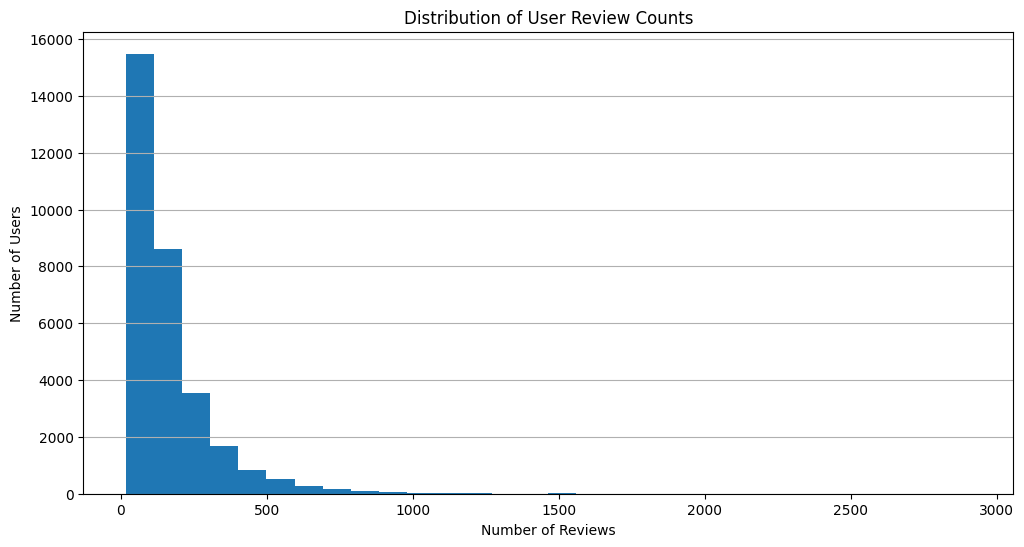

In [13]:
user_counts = rating_df['user'].value_counts()

# 히스토그램
plt.figure(figsize=(12, 6))
plt.hist(user_counts, bins=30)
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Users')
plt.title('Distribution of User Review Counts')
plt.grid(axis='y')
plt.show()


In [14]:
user_counts.describe()

count    31360.000000
mean       164.364509
std        150.009107
min         16.000000
25%         71.000000
50%        114.000000
75%        200.000000
max       2912.000000
Name: count, dtype: float64

In [15]:
user_n = rating_df['user'].nunique()
top_20pct_users = user_counts.sort_values(ascending=False).head(int(user_n * 0.2))
total_review_count = user_counts.sum()
top_users_count = top_20pct_users.sum()
print(f"Top 20% users contribute {top_users_count / total_review_count * 100:.2f}% of total reviews.")

Top 20% users contribute 48.08% of total reviews.


긴 꼬리 분포이긴 하지만 파레토 법칙(20:80)에 해당하지는 않는다.

In [16]:
# 리뷰 수를 기준으로 데이터프레임 생성
user_counts_df = pd.DataFrame(user_counts).reset_index()
user_counts_df.columns = ['user', 'count']

# 1000 단위로 그룹화하여 누적 비율 계산
bins = range(0, user_counts_df['count'].max() + 100, 100)
user_counts_df['bins'] = pd.cut(user_counts_df['count'], bins)

# 각 bin에 해당하는 사용자 수 계산
binned_counts = user_counts_df['bins'].value_counts().sort_index()

# 누적 비율 계산
cumulative_percentage = (binned_counts.cumsum() / binned_counts.sum()) * 100


# 결과를 데이터프레임으로 변환
cumulative_df = pd.DataFrame({
    'Review Count Range': binned_counts.index.astype(str),
    'User Count': binned_counts.values,
    'Cumulative Percentage': cumulative_percentage.values
})

# 결과 출력
print(cumulative_df)


   Review Count Range  User Count  Cumulative Percentage
0            (0, 100]       13636              43.482143
1          (100, 200]        9943              75.188138
2          (200, 300]        3936              87.739158
3          (300, 400]        1775              93.399235
4          (400, 500]         882              96.211735
5          (500, 600]         507              97.828444
6          (600, 700]         260              98.657526
7          (700, 800]         173              99.209184
8          (800, 900]          78              99.457908
9         (900, 1000]          60              99.649235
10       (1000, 1100]          33              99.754464
11       (1100, 1200]          28              99.843750
12       (1200, 1300]          18              99.901148
13       (1300, 1400]           5              99.917092
14       (1400, 1500]           5              99.933036
15       (1500, 1600]          10              99.964923
16       (1600, 1700]          

리뷰 400개 이상 남기는 유저는 active한 유저

In [17]:
top_users = user_counts_df[user_counts_df["count"] >= 400]
top_users

,user,count,bins
0,8405,2912,"(2900, 3000]"
1,54465,1980,"(1900, 2000]"
2,24219,1842,"(1800, 1900]"
3,32514,1830,"(1800, 1900]"
4,91349,1795,"(1700, 1800]"
...,...,...,...
2077,97735,400,"(300, 400]"
2078,4483,400,"(300, 400]"
2079,100738,400,"(300, 400]"
2080,124659,400,"(300, 400]"


##### item

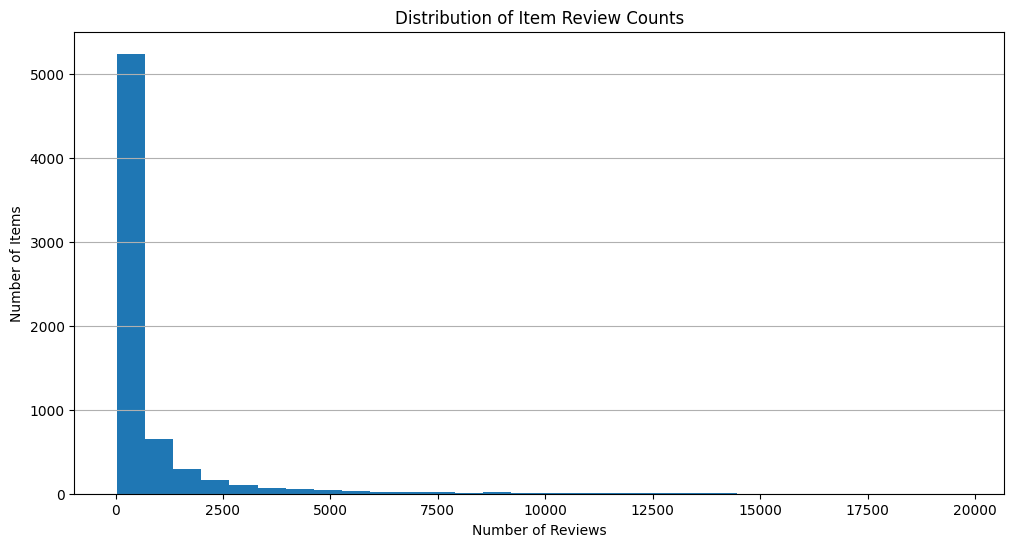

In [18]:
item_counts = rating_df['item'].value_counts()

# 히스토그램
plt.figure(figsize=(12, 6))
plt.hist(item_counts, bins=30)
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Items')
plt.title('Distribution of Item Review Counts')
plt.grid(axis='y')
plt.show()

In [19]:
item_counts.describe()

count     6807.000000
mean       757.230939
std       1682.973090
min         27.000000
25%         90.000000
50%        197.000000
75%        610.500000
max      19699.000000
Name: count, dtype: float64

In [20]:
item_n = rating_df['user'].nunique()
top_20pct_items = item_counts.sort_values(ascending=False).head(int(user_n * 0.2))
total_review_count = item_counts.sum()
top_items_count = top_20pct_items.sum()
print(f"Top 20% items contribute {top_items_count / total_review_count * 100:.2f}% of total reviews.")

Top 20% items contribute 99.48% of total reviews.


##### time

In [21]:
year_merged_df = pd.merge(rating_df, year_df, on='item', how='inner')

In [22]:
def year_graph(combined_year, ver):
    fig, ax1 = plt.subplots(figsize=(16, 4))
    plt.title("year of years vs time of ratings")

    ax1.set_xlabel("Year")
    ax1.plot(combined_year["year"], combined_year["ratings_count"], color="red", label="Ratings Count")
    ax1.set_ylabel("Ratings", color="red")
    ax1.tick_params(axis="y", labelcolor="red")

    ax2 = ax1.twinx()
    ax2.plot(combined_year["year"], combined_year["items_count"], color="blue", label="Items Count")
    ax2.set_ylabel("Items", color="blue")
    ax2.tick_params(axis="y", labelcolor="blue")

    # x축 눈금 설정
    match ver:
        case "org":
            min_year = int(combined_year["year"].min())
            max_year = int(combined_year["year"].max())
            years_range = range(1930, 2020 + 1, 20)  # 20년 단위 연도
            extra_years = [min_year, max_year, 2004, 2005, 2008]  # 추가
            x_ticks = sorted(set(years_range).union(extra_years))
            ax1.set_xticks(x_ticks)
            ax1.set_xticklabels(x_ticks, rotation=45)  # 각 연도 레이블을 45도 회전

    ax1.grid()
    plt.show()

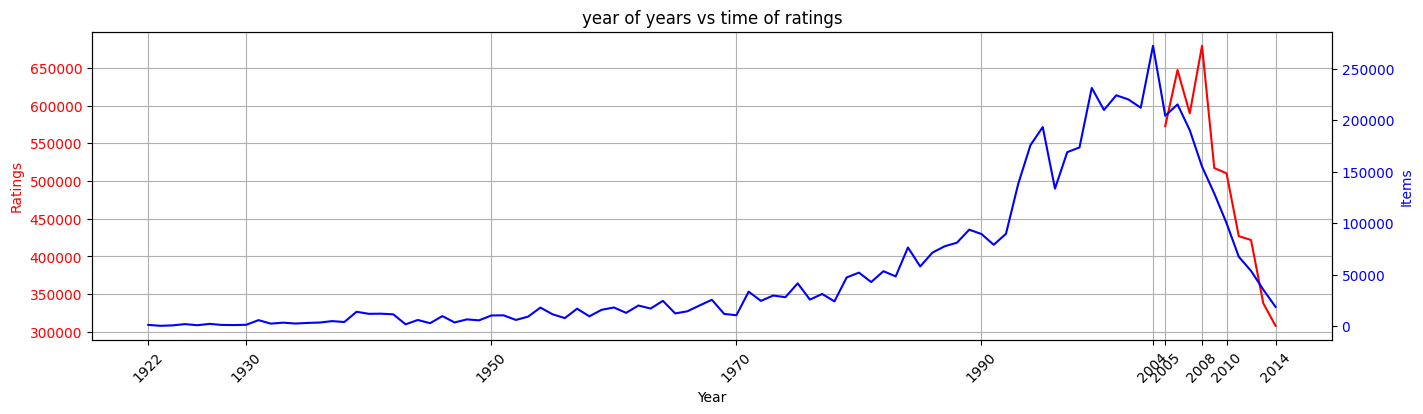

In [23]:
ratings_per_year = year_merged_df.groupby("time_yy").size().reset_index(name="ratings_count")
items_per_year = year_merged_df.groupby("year").size().reset_index(name="items_count")
combined_year = pd.merge(items_per_year, ratings_per_year, left_on="year", right_on="time_yy", how="outer")
year_graph(combined_year, "org")


In [24]:
# 원본
different_count = (year_merged_df['time_yy'] != year_merged_df['year']).sum()
total_count = len(year_merged_df)
percentage = (different_count / total_count) * 100 if total_count > 0 else 0

print(f"다른 경우의 수: {different_count}")
print(f"퍼센트: {percentage:.2f}%")

# 2005년 이후 개봉한 영화만
year_merged_drop_df = year_merged_df[year_merged_df['year'] >= 2005]

different_count = (year_merged_drop_df['time_yy'] != year_merged_drop_df['year']).sum()
total_count = len(year_merged_drop_df)
percentage = (different_count / total_count) * 100 if total_count > 0 else 0

print(f"다른 경우의 수: {different_count}")
print(f"퍼센트: {percentage:.2f}%")

# 개봉년 이후 3년 이후 리뷰가 작성된 경우로 조건 변경
different_count = (year_merged_drop_df['time_yy'] > year_merged_drop_df['year'] + 3).sum()
total_count = len(year_merged_drop_df)
percentage = (different_count / total_count) * 100 if total_count > 0 else 0

print(f"다른 경우의 수: {different_count}")
print(f"퍼센트: {percentage:.2f}%")


다른 경우의 수: 4984182
퍼센트: 96.73%
다른 경우의 수: 1000716
퍼센트: 85.59%
다른 경우의 수: 330882
퍼센트: 28.30%


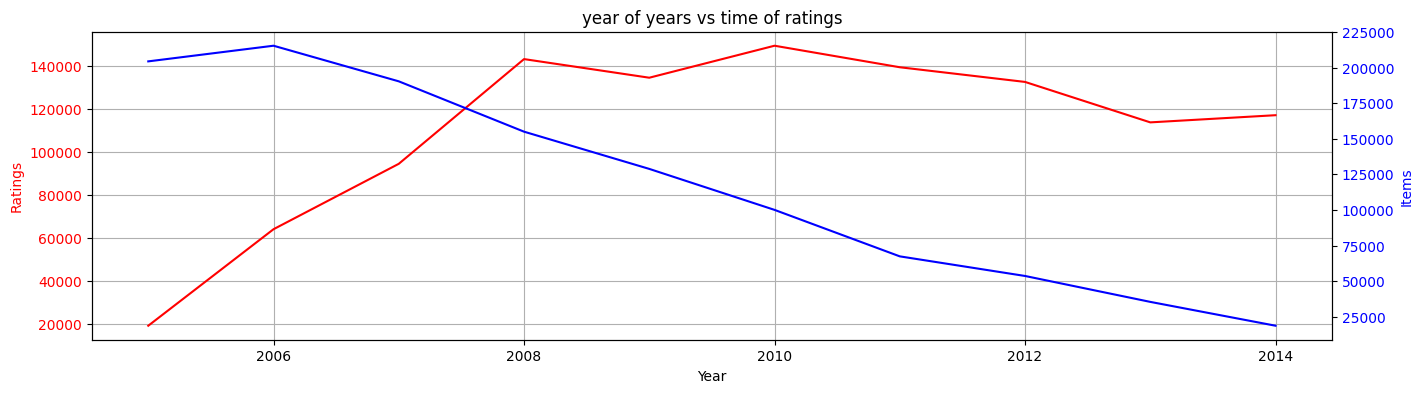

In [25]:
ratings_per_year = year_merged_drop_df.groupby("time_yy").size().reset_index(name="ratings_count")
items_per_year = year_merged_drop_df.groupby("year").size().reset_index(name="items_count")
combined_year = pd.merge(items_per_year, ratings_per_year, left_on="year", right_on="time_yy", how="outer")
year_graph(combined_year, "")


In [26]:
time_yy_min_max = year_merged_drop_df.groupby("year")["time_yy"].agg(["min", "max"]).reset_index()
print(time_yy_min_max)

   year   min   max
0  2005  2005  2015
1  2006  2006  2015
2  2007  2007  2015
3  2008  2008  2015
4  2009  2009  2015
5  2010  2010  2015
6  2011  2011  2015
7  2012  2011  2015
8  2013  2012  2015
9  2014  2014  2015


#### genre

          genre  count  percentage
0         Drama   3490       21.90
1        Comedy   2408       15.11
2      Thriller   1466        9.20
3       Romance   1251        7.85
4        Action   1246        7.82
5         Crime    924        5.80
6     Adventure    891        5.59
7        Sci-Fi    653        4.10
8        Horror    602        3.78
9       Fantasy    557        3.50
10      Mystery    471        2.96
11     Children    432        2.71
12    Animation    355        2.23
13          War    346        2.17
14  Documentary    323        2.03
15      Musical    282        1.77
16      Western    139        0.87
17    Film-Noir     97        0.61


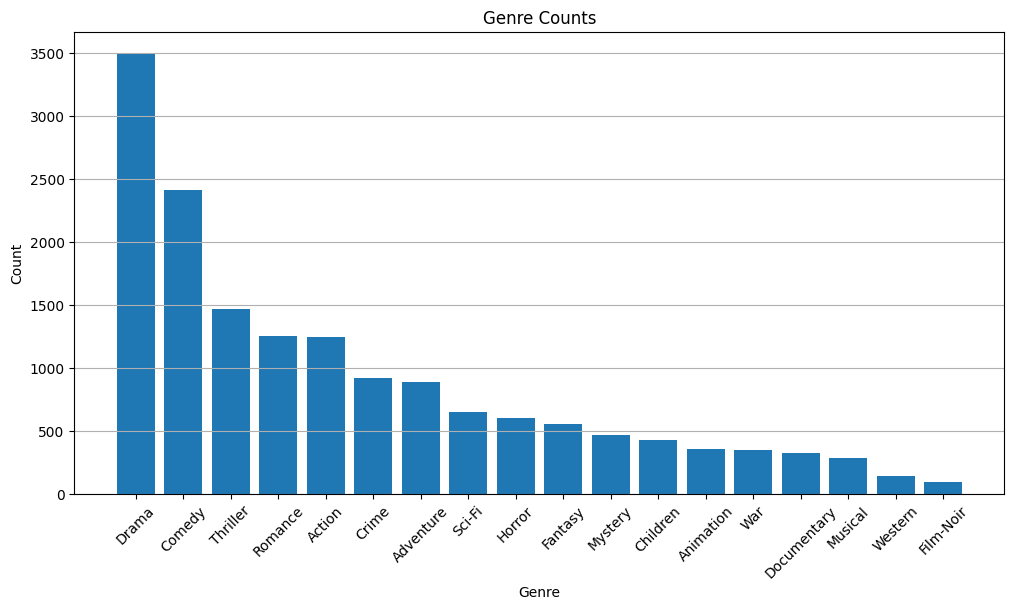

In [27]:
genre_counts = genre_df['genre'].value_counts().reset_index()
genre_counts.columns = ['genre', 'count']

total_count = genre_counts['count'].sum()
genre_counts['percentage'] = ((genre_counts['count'] / total_count) * 100).round(2)

genre_counts = genre_counts.sort_values(by='count', ascending=False).reset_index(drop=True)
print(genre_counts)

# 시각화
plt.figure(figsize=(12, 6))
plt.bar(genre_counts['genre'], genre_counts['count'])
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre Counts')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [ ]:
genre_counts = genre_df.groupby('item')['genre'].nunique()
counts = genre_counts.value_counts().sort_index()


total_items = genre_counts.shape[0]
percentage = ((counts / total_items) * 100).round(2)

result_df = pd.DataFrame({
    'Count of Genres': counts.index,
    'Number of Items': counts.values,
    'Percentage': percentage.values
})
print(result_df)

   Count of Genres  Number of Items  Percentage
0                1             1756       25.80
1                2             2280       33.49
2                3             1786       26.24
3                4              726       10.67
4                5              212        3.11
5                6               38        0.56
6                7                7        0.10
7                8                1        0.01
8               10                1        0.01


In [41]:
print(item_merged_df[item_merged_df["item"] == 81132])

        item          title      genre director writer    year
19296  81132  Rubber (2010)     Action      NaN    NaN  2010.0
19297  81132  Rubber (2010)  Adventure      NaN    NaN  2010.0
19298  81132  Rubber (2010)     Comedy      NaN    NaN  2010.0
19299  81132  Rubber (2010)      Crime      NaN    NaN  2010.0
19300  81132  Rubber (2010)      Drama      NaN    NaN  2010.0
19301  81132  Rubber (2010)  Film-Noir      NaN    NaN  2010.0
19302  81132  Rubber (2010)     Horror      NaN    NaN  2010.0
19303  81132  Rubber (2010)    Mystery      NaN    NaN  2010.0
19304  81132  Rubber (2010)   Thriller      NaN    NaN  2010.0
19305  81132  Rubber (2010)    Western      NaN    NaN  2010.0


In [49]:
# 다중 장르를 개별 열로 변환
genre_apriori_df = genre_df.explode('genre').pivot_table(index='item', columns='genre', aggfunc='size', fill_value=0)
genre_apriori_df

genre,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
item,,,,,,,,,,,,,,,,,,
1,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118700,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
118900,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
118997,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0


In [58]:
# 빈도수 기반 연관 규칙 학습
frequent_items = apriori(genre_apriori_df, min_support=0.1, use_colnames=True)

# num_itemsets 추가, 위에서 얻은 frequent_items의 길이를 가져옵니다.
num_itemsets = len(frequent_items)

# 규칙 생성
rules = association_rules(frequent_items, metric="confidence", min_threshold=0.2, num_itemsets=num_itemsets)

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Comedy),(Drama),0.353753,0.512708,0.112090,0.316860,0.618014,1.0,-0.069282,0.713313,-0.488864,0.148588,-0.401909,0.267743
1,(Drama),(Comedy),0.512708,0.353753,0.112090,0.218625,0.618014,1.0,-0.069282,0.827063,-0.559162,0.148588,-0.209098,0.267743
2,(Romance),(Drama),0.183781,0.512708,0.116351,0.633094,1.234804,1.0,0.022125,1.328111,0.232971,0.200557,0.247051,0.430014
3,(Drama),(Romance),0.512708,0.183781,0.116351,0.226934,1.234804,1.0,0.022125,1.055820,0.390228,0.200557,0.052869,0.430014
4,(Thriller),(Drama),0.215367,0.512708,0.103129,0.478854,0.933971,1.0,-0.007291,0.935040,-0.082654,0.165021,-0.069473,0.340000
5,(Drama),(Thriller),0.512708,0.215367,0.103129,0.201146,0.933971,1.0,-0.007291,0.982199,-0.126699,0.165021,-0.018124,0.340000


- antecedents: 규칙의 전제(상황, 조건).
- consequents: 규칙의 결과(결정, 예측).
- antecedent support: 전제가 전체에서 차지하는 비율.
- consequent support: 결과가 전체에서 차지하는 비율.
- support: 규칙이 전체 데이터에서 나타나는 비율.
- confidence: 결과가 주어졌을 때 전제가 참일 확률.
- lift: 전제가 있을 때 결과의 발생 증가 비율.
- leverage: 결과성을 기준으로 한 지지도를 나타냄.
- conviction: 전제가 참일 때 결과가 아닌 사건이 무시될 성질을 나타냄.

In [52]:
genre_merged_df = pd.merge(rating_df, genre_df, on='item', how='inner')

          genre    count  percentage
0         Drama  2511407       17.78
1        Comedy  1719017       12.17
2        Action  1504902       10.65
3      Thriller  1435678       10.16
4     Adventure  1203283        8.52
5         Crime  1014480        7.18
6       Romance   893843        6.33
7        Sci-Fi   857851        6.07
8       Fantasy   617807        4.37
9       Mystery   493005        3.49
10     Children   397929        2.82
11    Animation   370761        2.62
12       Horror   343730        2.43
13          War   307170        2.17
14      Musical   199635        1.41
15      Western    95374        0.68
16  Documentary    90050        0.64
17    Film-Noir    70402        0.50


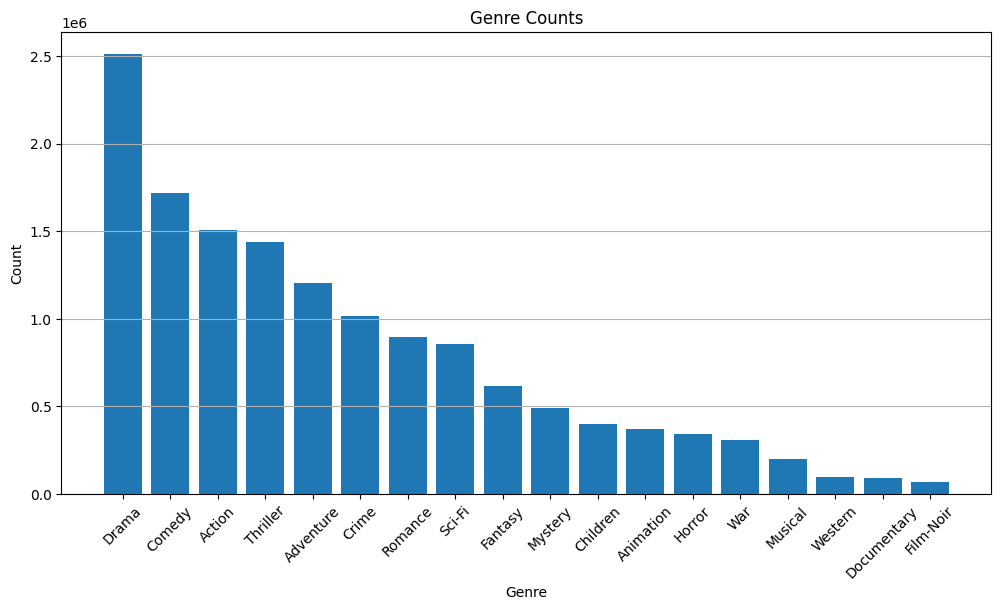

In [60]:
genre_counts = genre_merged_df['genre'].value_counts().reset_index()
genre_counts.columns = ['genre', 'count']

total_count = genre_counts['count'].sum()
genre_counts['percentage'] = ((genre_counts['count'] / total_count) * 100).round(2)

genre_counts = genre_counts.sort_values(by='count', ascending=False).reset_index(drop=True)
print(genre_counts)

# 시각화
plt.figure(figsize=(12, 6))
plt.bar(genre_counts['genre'], genre_counts['count'])
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre Counts')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

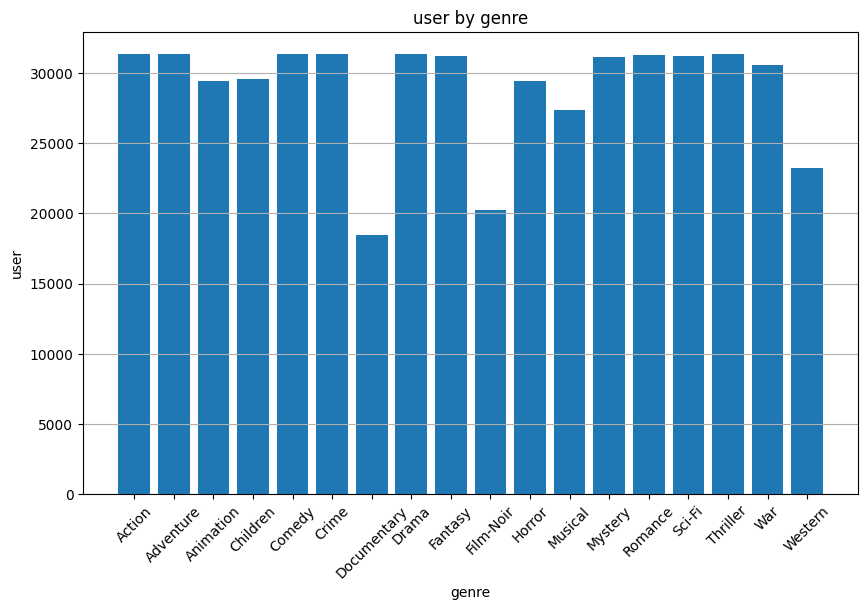

In [72]:
# 장르별 사용자 수 계산
genre_counts = genre_merged_df.groupby('genre')['user'].nunique().reset_index()
genre_counts.columns = ['genre', 'user']

# 막대 그래프 시각화
plt.figure(figsize=(10, 6))
plt.bar(genre_counts['genre'], genre_counts['user'])
plt.xlabel('genre')
plt.ylabel('user')
plt.title('user by genre')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [73]:
genre_counts

,genre,user
0,Action,31327
1,Adventure,31343
2,Animation,29444
3,Children,29591
4,Comedy,31357
5,Crime,31333
6,Documentary,18456
7,Drama,31359
8,Fantasy,31181
9,Film-Noir,20237
